In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from pynverse import inversefunc

In [2]:
nu, u1, u2 = 1., 0., 1.
l = 0.5
t = 1

def gen_fun_and_inv(n, eps):
    if n == 1:
        fun = (lambda u:2*nu/(u1-u2)*np.log((u - u1)/(u2 - u)))
    else:
        fun = (lambda u:-(2*nu)**(1/n)*n*(u-u1)*((u2-u)/(u2-u1))**(1/n)*((u-u1)*(u2-u))**(-1/n)*scipy.special.hyp2f1(1/n,1-1/n,2-1/n, (u-u1)/(u2-u1))/(n-1))
    inv = (lambda xi: inversefunc(fun, y_values=xi, domain=[u1+eps,u2-eps]))
    return fun, inv

# n = 1

$$
f(u)
= -2 \nu \int \frac{du}{(u - u_1)(u_2 - u)}
= \frac{2 \nu}{u_1 - u_2} \log\left( \frac{u-u_1}{u_2-u} \right)
$$
and
$$
u(\xi) = f^{-1}(\xi)
= u_2 + (u_1 - u_2)\left(1 + \exp\left(\frac{(u_1-u_2)\xi}{2\nu}\right)\right)^{-1}
$$

In [3]:
exact_fun = (lambda u:2*nu/(u1-u2)*np.log((u - u1)/(u2 - u)))
exact_inv = (lambda xi: u2 + (u1 - u2) / (1 + np.exp((u1 - u2)*xi/(2*nu))))

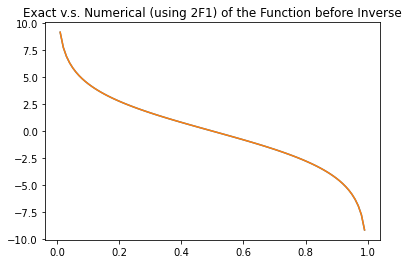

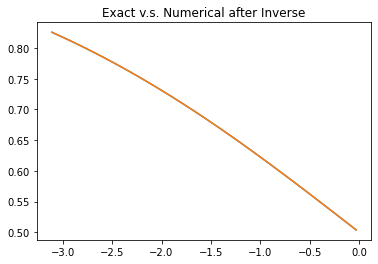

In [4]:
n = 1
x_for_fun = np.linspace(u1, u2, 100)[1:-1]
x_for_inv = np.linspace(-math.pi, 0, 100)[1:-1]
fun, inv = gen_fun_and_inv(n, eps=.00001)

# plot
plt.plot(x_for_fun, exact_fun(x_for_fun))
plt.plot(x_for_fun, fun(x_for_fun))
plt.title("Exact v.s. Numerical (using 2F1) of the Function before Inverse")
plt.show()

plt.plot(x_for_inv, exact_inv(x_for_inv))
plt.plot(x_for_inv, inv(x_for_inv))
plt.title("Exact v.s. Numerical after Inverse")
plt.show()

# n = 2

$$
f(u)
= -(2 \nu)^{1/2} \int \frac{du}{\sqrt{(u - u_1)(u_2 - u)}}
= -2 (2 \nu)^{1/2} \arcsin\left(\sqrt{\frac{u - u_1}{u_2 - u_1}}\right)
$$
and
$$
u(\xi) = f^{-1}(\xi)
= u_1 + (u_2 - u_1) \sin^2 \left(-\frac{\xi}{2\sqrt{2 \nu}}\right)
$$

In [5]:
exact_fun = (lambda u: -2*math.sqrt(2*nu)*np.arcsin(np.sqrt((u-u1)/(u2-u1))))
exact_inv = (lambda xi: u1 + (u2 - u1) * np.sin(-xi/(2*math.sqrt(2*nu)))**2)

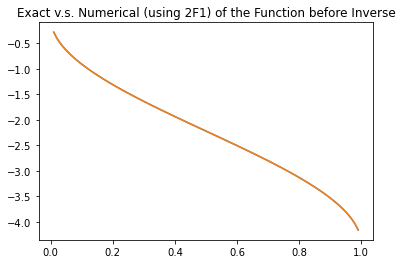

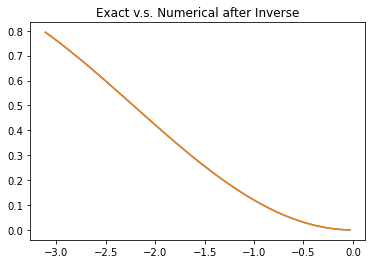

In [6]:
n = 2
x_for_fun = np.linspace(u1, u2, 100)[1:-1]
x_for_inv = np.linspace(-math.pi, 0, 100)[1:-1]
fun, inv = gen_fun_and_inv(n, eps=.00001)

# plot
plt.plot(x_for_fun, exact_fun(x_for_fun))
plt.plot(x_for_fun, fun(x_for_fun))
plt.title("Exact v.s. Numerical (using 2F1) of the Function before Inverse")
plt.show()

plt.plot(x_for_inv, exact_inv(x_for_inv))
plt.plot(x_for_inv, inv(x_for_inv))
plt.title("Exact v.s. Numerical after Inverse")
plt.show()